# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [1]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [2]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [3]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

## Data Exploration

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Class distribution of 'Recommended IND':
Class 0 (Not Recommended): 3389 (18.38%)
Class 1 (Recommended): 15053 (81.62%)


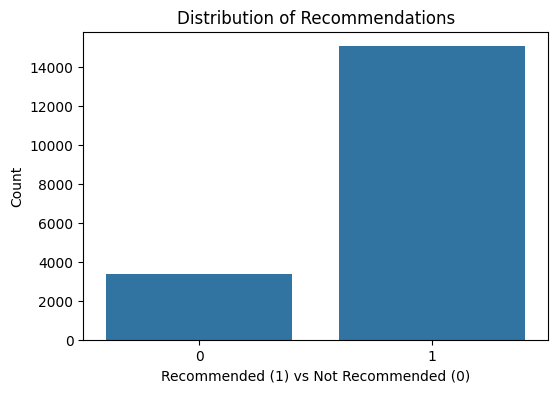

In [5]:
# Class distribution of target variable
print("Class distribution of 'Recommended IND':")
class_counts = data['Recommended IND'].value_counts()
class_percentages = data['Recommended IND'].value_counts(normalize=True) * 100
print(f"Class 0 (Not Recommended): {class_counts[0]} ({class_percentages[0]:.2f}%)")
print(f"Class 1 (Recommended): {class_counts[1]} ({class_percentages[1]:.2f}%)")

plt.figure(figsize=(6, 4))
sns.countplot(x='Recommended IND', data=data)
plt.title('Distribution of Recommendations')
plt.xlabel('Recommended (1) vs Not Recommended (0)')
plt.ylabel('Count')
plt.show()

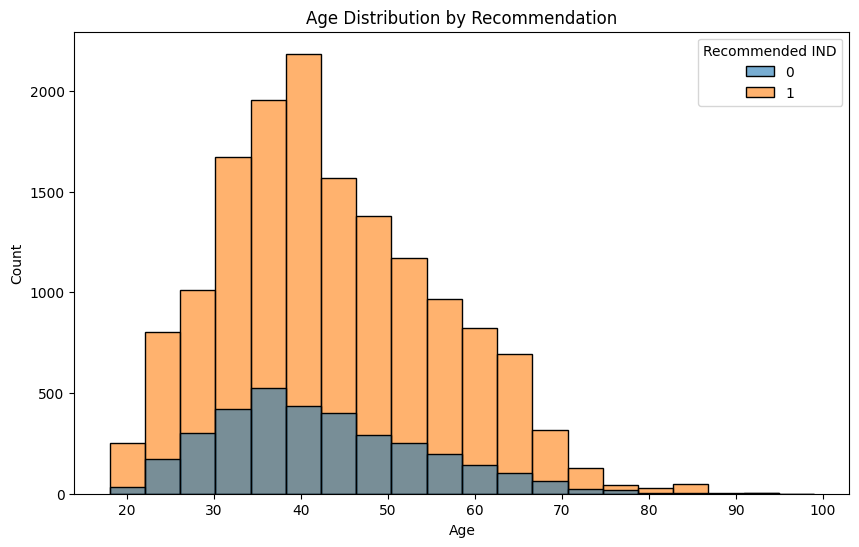

In [6]:
#Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Recommended IND', bins=20, alpha=0.6)
plt.title('Age Distribution by Recommendation')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

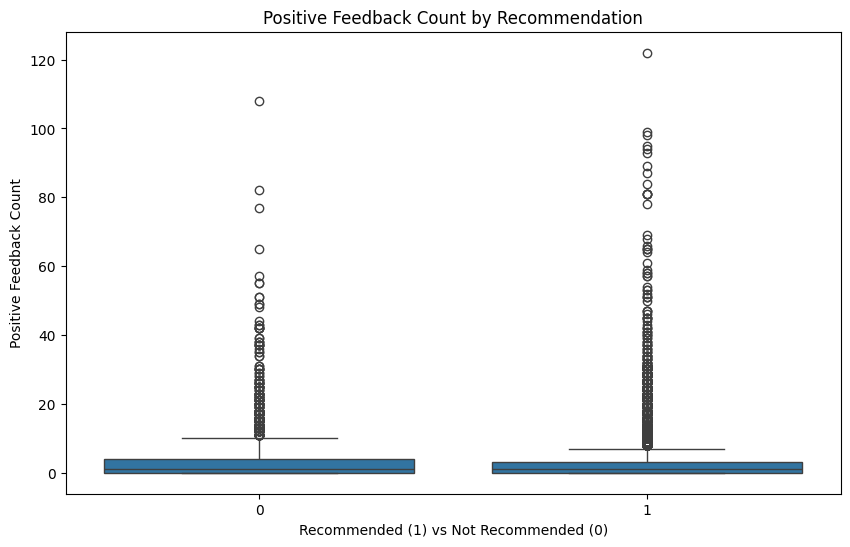

In [7]:
# Positive feedback
plt.figure(figsize=(10, 6))
sns.boxplot(x='Recommended IND', y='Positive Feedback Count', data=data)
plt.title('Positive Feedback Count by Recommendation')
plt.xlabel('Recommended (1) vs Not Recommended (0)')
plt.ylabel('Positive Feedback Count')
plt.show()

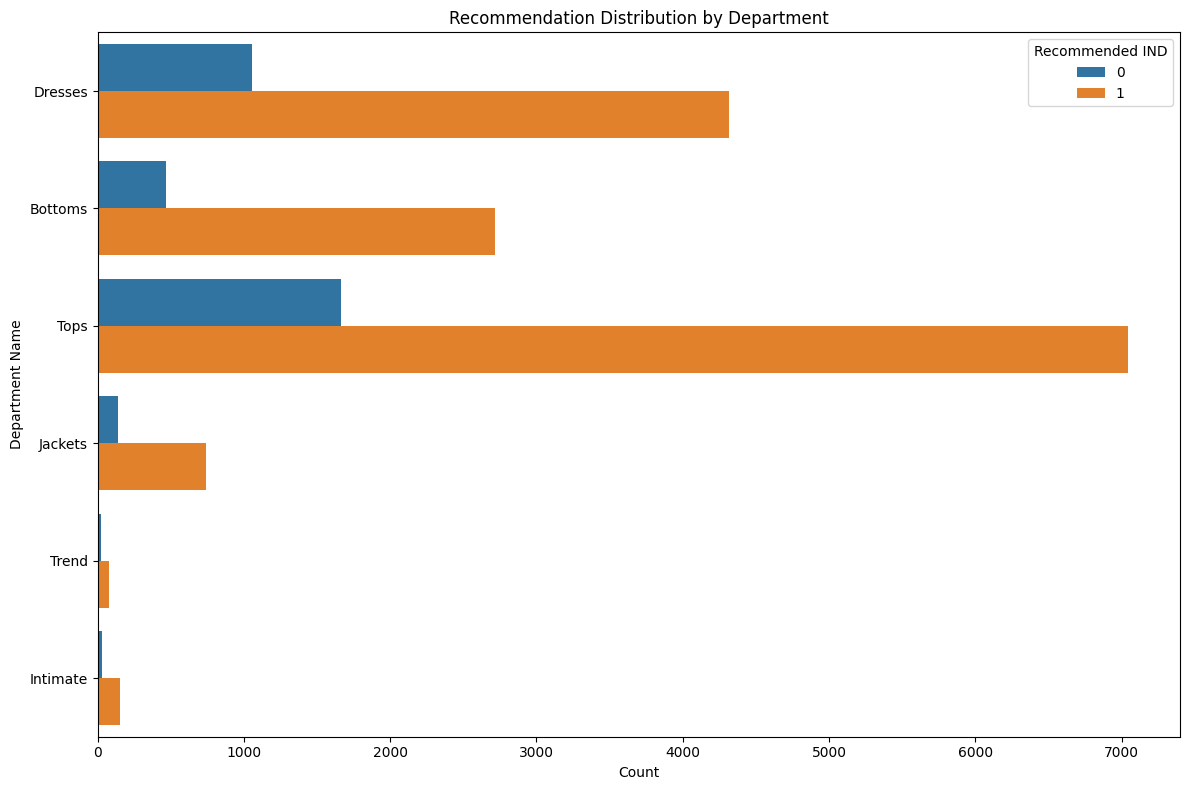

In [8]:
# Categorical features
plt.figure(figsize=(12, 8))
sns.countplot(y='Department Name', hue='Recommended IND', data=data)
plt.title('Recommendation Distribution by Department')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


In [9]:
# Combined text feature for analysis
data['Full_Review'] = data['Title'].fillna('') + ' ' + data['Review Text'].fillna('')

# Sample reviews for recommended and unrecommended products
print("\nSample reviews for not recommended products (class 0):")
for i, review in enumerate(data[data['Recommended IND'] == 0]['Full_Review'].head(3)):
    print(f"{i+1}. {review[:200]}...")

print("\nSample reviews for recommended products (class 1):")
for i, review in enumerate(data[data['Recommended IND'] == 1]['Full_Review'].head(3)):
    print(f"{i+1}. {review[:200]}...")


Sample reviews for not recommended products (class 0):
1. Some major design flaws I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so sma...
2. Not for the very petite I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the pack...
3. Dress looks like it's made of cheap material Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels ve...

Sample reviews for recommended products (class 1):
1. My favorite buy! I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!...
2. Flattering shirt This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear 

In [10]:
# Correlation
print("\nAge and Positive Feedback Count Corrlation:")
print(data[['Age', 'Positive Feedback Count']].corr())


Age and Positive Feedback Count Corrlation:
                              Age  Positive Feedback Count
Age                      1.000000                 0.039429
Positive Feedback Count  0.039429                 1.000000


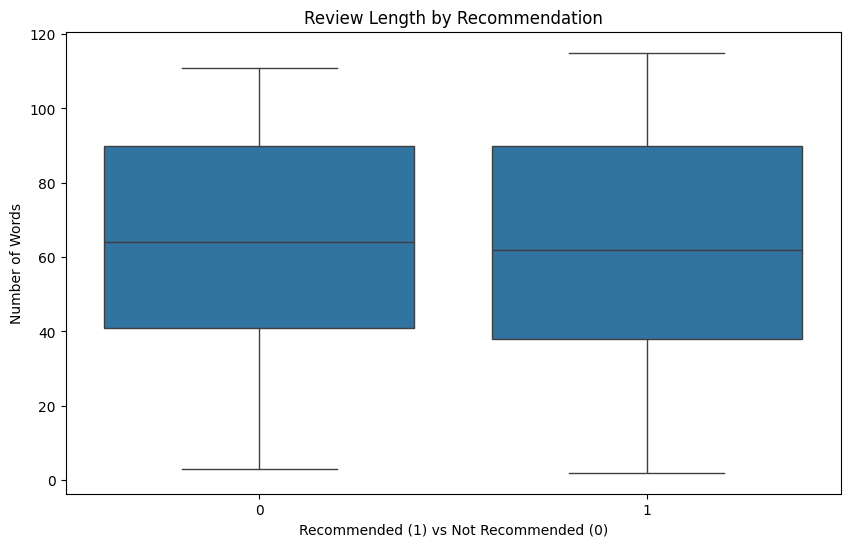

Average review length for not recommended products (0): 63.80 words
Average review length for recommended products (1): 62.15 words
Difference in average length: 1.65 words


In [11]:
# Review length
data['Review_Length'] = data['Review Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.boxplot(x='Recommended IND', y='Review_Length', data=data)
plt.title('Review Length by Recommendation')
plt.xlabel('Recommended (1) vs Not Recommended (0)')
plt.ylabel('Number of Words')
plt.show()

# Average review length by recommendation category
avg_length_not_recommended = data[data['Recommended IND'] == 0]['Review_Length'].mean()
avg_length_recommended = data[data['Recommended IND'] == 1]['Review_Length'].mean()

print(f"Average review length for not recommended products (0): {avg_length_not_recommended:.2f} words")
print(f"Average review length for recommended products (1): {avg_length_recommended:.2f} words")
print(f"Difference in average length: {abs(avg_length_not_recommended - avg_length_recommended):.2f} words")

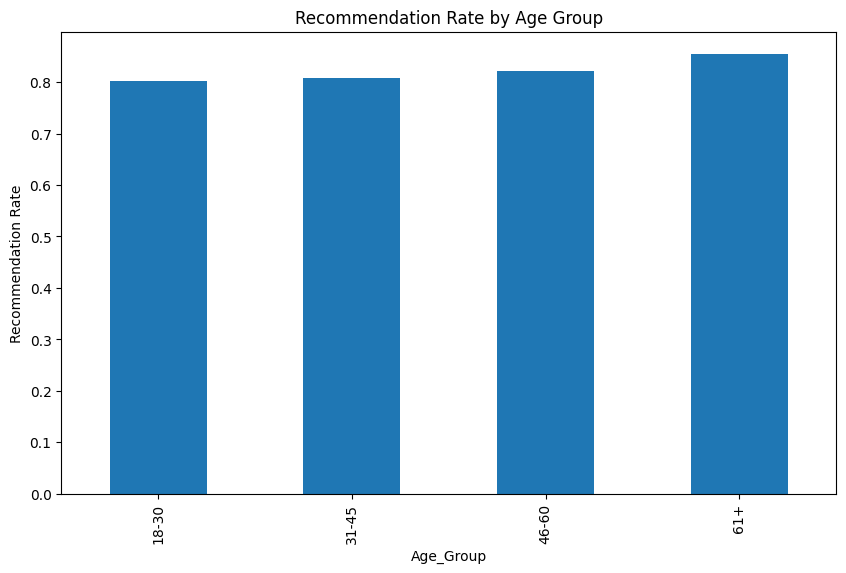

Average age of customers who did not recommend products: 42.44
Average age of customers who recommended products: 43.60


In [12]:
# Age Binning and Average Age

data['Age_Group'] = pd.cut(data['Age'], bins=[18, 30, 45, 60, 100], labels=['18-30', '31-45', '46-60', '61+'])
age_rec_rates = data.groupby('Age_Group')['Recommended IND'].mean()
plt.figure(figsize=(10, 6))
age_rec_rates.plot(kind='bar')
plt.title('Recommendation Rate by Age Group')
plt.ylabel('Recommendation Rate')
plt.show()

print(f"Average age of customers who did not recommend products: {data[data['Recommended IND'] == 0]['Age'].mean():.2f}")
print(f"Average age of customers who recommended products: {data[data['Recommended IND'] == 1]['Age'].mean():.2f}")

In [13]:
# Based on data exploration:
# Imbalance with approximately 82% of reviews recommending products (class 1) and 18% not recommending (class 0).
# The age distribution appears similar across both classes, suggesting age alone is not a strong predictor.
# Positive feedback counts tend to be higher for recommended products.
# Different departments have different recommendation rates
# Text content of reviews contains clear sentiment differences between recommended and unrecommended products.
# Review length appears to be fairly similar between recommended and unrecommended products.

## Building Pipeline

In [14]:
# Pipeline libraries
import spacy
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [15]:
# SpaCy model for NLP processing
try:
    nlp = spacy.load('en_core_web_sm')
except OSError:
    print("Downloading spaCy model...")
    import sys
    import subprocess
    subprocess.run([sys.executable, "-m", "spacy", "download", "en_core_web_sm"])
    nlp = spacy.load('en_core_web_sm')


In [16]:
# Combined text field
X_train['Full_Review'] = X_train['Title'].fillna('') + ' ' + X_train['Review Text'].fillna('')
X_test['Full_Review'] = X_test['Title'].fillna('') + ' ' + X_test['Review Text'].fillna('')

In [17]:
# SpacyTextProcessor
class SpacyTextProcessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Load spaCy model during initialization
        try:
            self.nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
        except OSError:
            import subprocess
            import sys
            subprocess.run([sys.executable, "-m", "spacy", "download", "en_core_web_sm"])
            self.nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    
    def fit(self, X, y=None):
        # This transformer doesn't need to learn anything
        return self
    
    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            texts = X.iloc[:, 0].astype(str).copy().tolist()
        else:
            texts = [str(x) for x in X.copy()]
        
        processed_docs = []
        for text in texts:
            doc = self.nlp(text.lower())
            tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
            processed_docs.append(' '.join(tokens))
        return processed_docs

In [18]:
# Identify column types
numeric_features = ['Age', 'Positive Feedback Count']
categorical_features = ['Clothing ID', 'Division Name', 'Department Name', 'Class Name']
text_features = ['Full_Review']

In [19]:
# Preprocessors for each data type

# Numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())  
])

# Categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  
])

# Text features
text_transformer = Pipeline(steps=[
    ('selector', FunctionTransformer(lambda x: x[['Full_Review']], validate=False)),
    ('preprocessor', SpacyTextProcessor()),  # spaCy processing
    ('vectorizer', TfidfVectorizer(
        max_features=3000,  
        min_df=2,  
        max_df=0.85,  
        ngram_range=(1, 2)  
    ))
])

In [20]:
# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, text_features)  # Pass as list for the extractor
    ],
    remainder='drop'  # Drop any column not mentioned explicitly
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Positive Feedback Count']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Clothing ID', 'Division Name',
                                  'Department Name', 'Class Name']),
                                ('text',
                                 Pipeline(steps=[('selector',
                                                  FunctionTransformer(func=<function <lambda> at 0x7f888508a430>)),
                                                 ('preprocessor',
                                                  SpacyTextProcessor()),
                                                 ('vectorizer',
                                                  TfidfVectorizer(max_df=0.85,
                                                                  max_features=3000,
                                                                  min_df=2,
                                                                  ngram_range=(1,
                                                                               2)))]),
                                 ['Full_Review'])])

## Training Pipeline

In [21]:
# Random Forest Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100, 
        random_state=27,
        class_weight='balanced',  # Handle class imbalance
        n_jobs=-1  # Use all available cores
    ))
])

In [22]:
# XGBoost Pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        random_state=27,
        n_jobs=-1
    ))
])

In [23]:
# Train Random Forest Pipeline
print("Training Random Forest pipeline...")
rf_pipeline.fit(X_train, y_train)

Training Random Forest pipeline...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Positive Feedback Count']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Clothing ID',
                                                   'Division Na...
                                                   'Class Name']),
                                                 ('text',
                                                  Pipeline(steps=[('selector',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7f888508a430>)),
                                                                  ('preprocessor',
                                                                   SpacyTextProcessor()),
                                                                  ('vectorizer',
                                                                   TfidfVectorizer(max_df=0.85,
                                                                                   max_features=3000,
                                                                                   min_df=2,
                                                                                   ngram_range=(1,
                                                                                                2)))]),
                                                  ['Full_Review'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', n_jobs=-1,
                                        random_state=27))])

In [24]:
# Train the XGBoost Pipeline
print("Training XGBoost pipeline...")
xgb_pipeline.fit(X_train, y_train)

Training XGBoost pipeline...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Positive Feedback Count']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Clothing ID',
                                                   'Division Na...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=-1,
                               num_parallel_tree=None, random_state=27, ...))])

In [25]:
# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
# Random Forest Evaluation
rf_preds = rf_pipeline.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"\nRandom Forest Initial Accuracy: {rf_accuracy:.4f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_preds))


Random Forest Initial Accuracy: 0.8705

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.39      0.52       327
           1       0.88      0.97      0.93      1518

    accuracy                           0.87      1845
   macro avg       0.82      0.68      0.72      1845
weighted avg       0.86      0.87      0.85      1845



In [27]:
# XGBoost Evaluation
xgb_preds = xgb_pipeline.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print(f"\nXGBoost Initial Accuracy: {xgb_accuracy:.4f}")
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_preds))


XGBoost Initial Accuracy: 0.8748

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.44      0.55       327
           1       0.89      0.97      0.93      1518

    accuracy                           0.87      1845
   macro avg       0.82      0.70      0.74      1845
weighted avg       0.86      0.87      0.86      1845



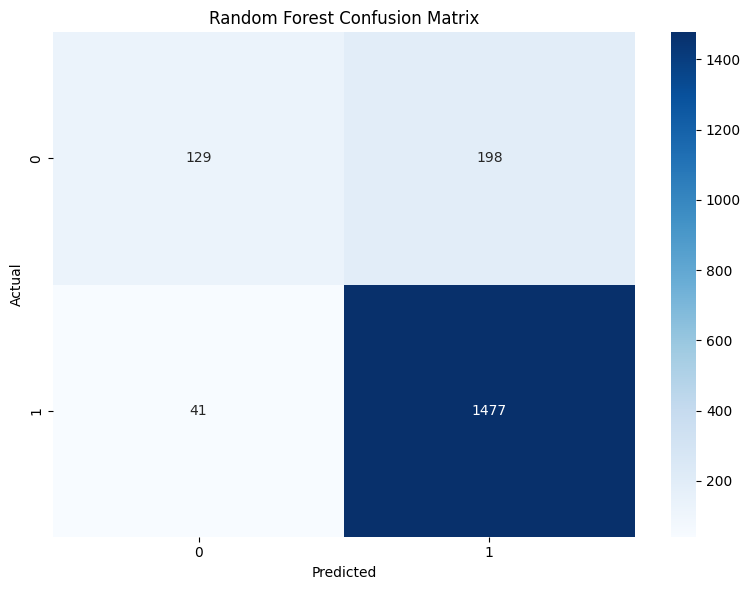

In [28]:
# Random Forest Confusion Matrix

cm_rf = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

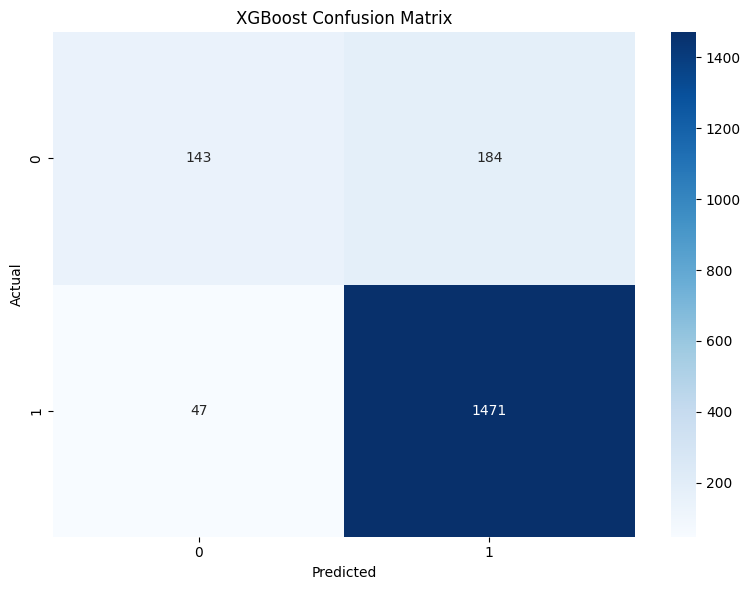

In [29]:
# XGBoost Confusion Matrix

cm_xgb = confusion_matrix(y_test, xgb_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [30]:
# Comparison of Model Performance Before Hyperparameter Tuning
print("\nModel Comparison:")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

if rf_accuracy >= xgb_accuracy:
    print("\nRandom Forest performs better.")
    best_initial_model = rf_pipeline
    model_name = "Random Forest"
else:
    print("\nXGBoost performs better.")
    best_initial_model = xgb_pipeline
    model_name = "XGBoost"


Model Comparison:
Random Forest Accuracy: 0.8705
XGBoost Accuracy: 0.8748

XGBoost performs better.


In [31]:
## Fine-Tuning Pipeline

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
# Parameter grid based on Random Forest
rf_param_grid = {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 20, 30],
        'classifier__min_samples_split': [2, 5],
        'classifier__max_features': ['sqrt', 'log2'],
    }

In [34]:
# Parameter grid based on XGBoost
xgb_param_grid = {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [3, 6, 9],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__subsample': [0.8, 1.0],
    }

In [35]:
import time

# Time test for Random Forest
start_rf = time.time()
rf_pipeline.fit(X_train[:100], y_train[:100])
rf_time = time.time() - start_rf

# Time test for XGBoost
start_xgb = time.time()
xgb_pipeline.fit(X_train[:100], y_train[:100])
xgb_time = time.time() - start_xgb

print(f"Random Forest fit time: {rf_time:.2f}s")
print(f"XGBoost fit time: {xgb_time:.2f}s")

Random Forest fit time: 1.28s
XGBoost fit time: 1.37s


In [36]:
# Random Forest Hyperparameter Tuning
print("\nPerforming hyperparameter tuning for Random Forest...")
print("This may take some time...")

rf_grid_search = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  
    verbose=1
)

rf_grid_search.fit(X_train, y_train)


Performing hyperparameter tuning for Random Forest...
This may take some time...
Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Positive '
                                                                          'Feedback '
                                                                          'Count']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=Fal...
                                                                                                          max_features=3000,
                                                                                                          min_df=2,
                                                                                                          ngram_range=(1,
                                                                                                                       2)))]),
                                                                         ['Full_Review'])])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               n_jobs=-1,
                                                               random_state=27))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 20, 30],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [37]:
# Best parameters and model for Rondom Forest
print("\nBest Random Forest parameters:")
print(rf_grid_search.best_params_)


Best Random Forest parameters:
{'classifier__max_depth': 30, 'classifier__max_features': 'log2', 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}



Best Random Forest Model Accuracy: 0.8759

Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.66      0.65       327
           1       0.93      0.92      0.92      1518

    accuracy                           0.88      1845
   macro avg       0.79      0.79      0.79      1845
weighted avg       0.88      0.88      0.88      1845



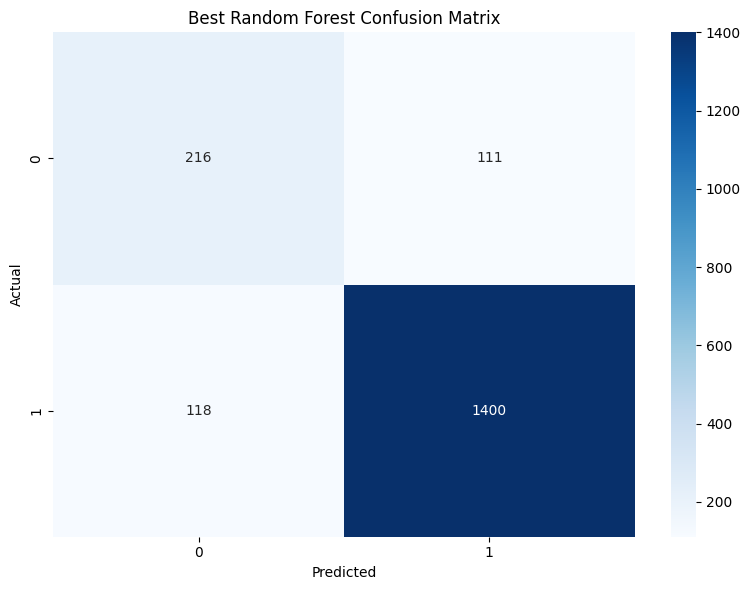

In [38]:
# Evaluation of tuned Random Forest model
best_rf_model = rf_grid_search.best_estimator_
best_rf_preds = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_preds)

print(f"\nBest Random Forest Model Accuracy: {best_rf_accuracy:.4f}")
print(f"\nBest Random Forest Classification Report:")
print(classification_report(y_test, best_rf_preds))

# Visualization of confusion matrix for forest Random Forest model
plt.figure(figsize=(8, 6))
cm_best_rf = confusion_matrix(y_test, best_rf_preds)
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Best Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [39]:
# Random Forest improvement
rf_improvement = best_rf_accuracy - rf_accuracy
print(f"\nRandom Forest improvement after tuning: {rf_improvement:.4f} ({rf_improvement/rf_accuracy*100:.2f}%)")


Random Forest improvement after tuning: 0.0054 (0.62%)


In [41]:
# XGBoost Hyperparameter Tuning
print("\nPerforming hyperparameter tuning for XGBoost...")
print("This may take some time...")

xgb_grid_search = GridSearchCV(
    xgb_pipeline,
    xgb_param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

xgb_grid_search.fit(X_train, y_train)


Performing hyperparameter tuning for XGBoost...
This may take some time...
Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Positive '
                                                                          'Feedback '
                                                                          'Count']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=Fal...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=100,
                                                      n_jobs=-1,
                                                      num_parallel_tree=None,
                                                      random_state=27, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1],
                         'classifier__max_depth': [3, 6, 9],
                         'classifier__n_estimators': [100, 200],
                         'classifier__subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [42]:
# Best parameters and model for XGBoost
print("\nBest XGBoost parameters:")
print(xgb_grid_search.best_params_)


Best XGBoost parameters:
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 9, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}



Best XGBoost Model Accuracy: 0.8846

Best XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.54      0.62       327
           1       0.91      0.96      0.93      1518

    accuracy                           0.88      1845
   macro avg       0.82      0.75      0.78      1845
weighted avg       0.88      0.88      0.88      1845



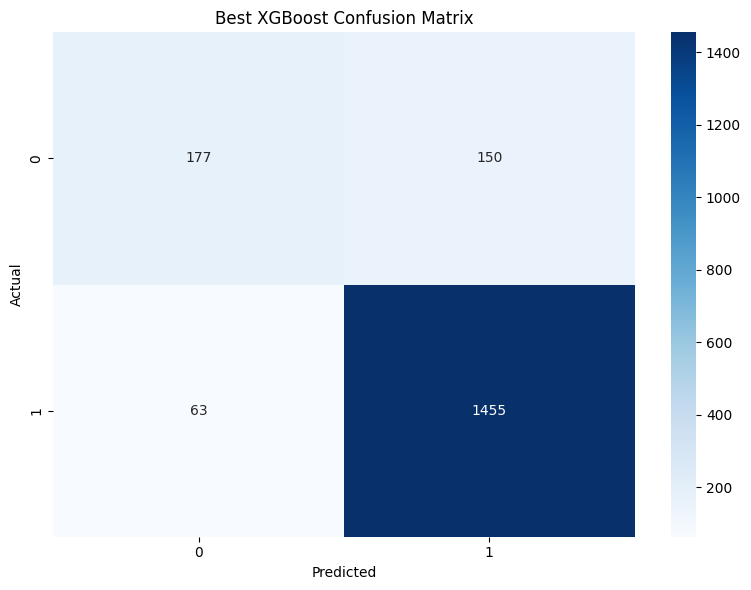

In [43]:
# Evaluation of tuned XGBoost model
best_xgb_model = xgb_grid_search.best_estimator_
best_xgb_preds = best_xgb_model.predict(X_test)
best_xgb_accuracy = accuracy_score(y_test, best_xgb_preds)

print(f"\nBest XGBoost Model Accuracy: {best_xgb_accuracy:.4f}")
print(f"\nBest XGBoost Classification Report:")
print(classification_report(y_test, best_xgb_preds))

# Visualization of confusion matrix for the best XGBoost model
plt.figure(figsize=(8, 6))
cm_best_xgb = confusion_matrix(y_test, best_xgb_preds)
sns.heatmap(cm_best_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Best XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [44]:
# XGBoost improvement
xgb_improvement = best_xgb_accuracy - xgb_accuracy
print(f"\nXGBoost improvement after tuning: {xgb_improvement:.4f} ({xgb_improvement/xgb_accuracy*100:.2f}%)")


XGBoost improvement after tuning: 0.0098 (1.12%)


In [45]:
# Overall best model
if best_rf_accuracy >= best_xgb_accuracy:
    best_model = best_rf_model
    best_accuracy = best_rf_accuracy
    best_preds = best_rf_preds
    best_model_name = "Random Forest"
else:
    best_model = best_xgb_model
    best_accuracy = best_xgb_accuracy
    best_preds = best_xgb_preds
    best_model_name = "XGBoost"

print(f"\nOverall best model: {best_model_name} with accuracy: {best_accuracy:.4f}")


Overall best model: XGBoost with accuracy: 0.8846



XGBoost Feature Importance by Type:
Numeric: 0.12%
Categorical: 1.80%
Text: 98.08%


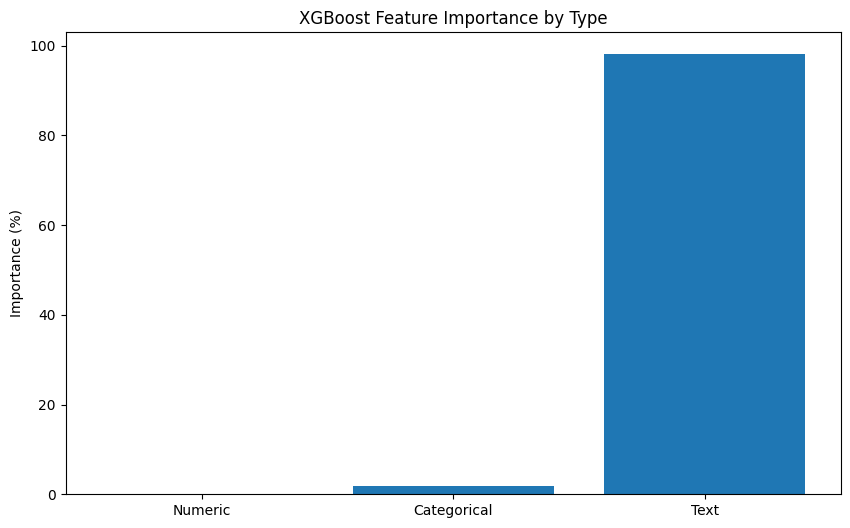

{'Numeric': 0.11985007438405158,
 'Categorical': 1.7992144562137213,
 'Text': 98.08093546940223}

In [71]:
def analyze_feature_importance(model, model_name, numeric_features, categorical_features, text_features):
    try:
        importances = model.named_steps['classifier'].feature_importances_

        # Preprocessor from the pipeline
        preprocessor = model.named_steps['preprocessor']
       
        
       # 1. Numeric Features (from StandardScaler)
        num_transformer = preprocessor.named_transformers_['num']
        num_features = numeric_features  # Original column names (e.g., ['Age', 'Positive Feedback Count'])
        
        # 2. Categorical Features (from OneHotEncoder)
        cat_transformer = preprocessor.named_transformers_['cat']
        cat_encoder = cat_transformer.named_steps['onehot']
        cat_features = cat_encoder.get_feature_names_out(cat_transformer.feature_names_in_)
        
        # 3. Text Features (from TfidfVectorizer, bypassing FunctionTransformer)
        text_transformer = preprocessor.named_transformers_['text']
        text_vectorizer = text_transformer.named_steps['vectorizer']
        text_features_names = text_vectorizer.get_feature_names_out()
        
        # Combine all feature names in the order: num -> cat -> text
        transformed_features = (
            list(num_features) + 
            list(cat_features) + 
            list(text_features_names))
        
        # Verify feature count matches
        assert len(importances) == len(transformed_features), "Feature count mismatch!"
        
  
        # Group importances by type using reconstructed names
        numeric_indices = [i for i, f in enumerate(transformed_features) if f in num_features]
        categorical_indices = [i for i, f in enumerate(transformed_features) if f in cat_features]
        text_indices = [i for i, f in enumerate(transformed_features) if f in text_features_names]
        
        importance_by_type = {
            'Numeric': np.sum(importances[numeric_indices]),
            'Categorical': np.sum(importances[categorical_indices]),
            'Text': np.sum(importances[text_indices])
        }
        
        # Normalize to percentages
        total = sum(importance_by_type.values())
        for key in importance_by_type:
            importance_by_type[key] = (importance_by_type[key] / total) * 100
        
        # Plotting and printing
        print(f"\n{model_name} Feature Importance by Type:")
        for k, v in importance_by_type.items():
            print(f"{k}: {v:.2f}%")
            
        plt.figure(figsize=(10, 6))
        plt.bar(importance_by_type.keys(), importance_by_type.values())
        plt.title(f'{model_name} Feature Importance by Type')
        plt.ylabel('Importance (%)')
        plt.show()
        
        return importance_by_type
    
    except Exception as e:
        print(f"Error: {e}")
        return None
    
analyze_feature_importance(
    best_model, 
    best_model_name, 
    numeric_features, 
    categorical_features, 
    text_features
)


----- FEATURE IMPORTANCE ANALYSIS -----

Random Forest Feature Importance by Type:
Numeric: 0.97%
Categorical: 2.49%
Text: 96.54%


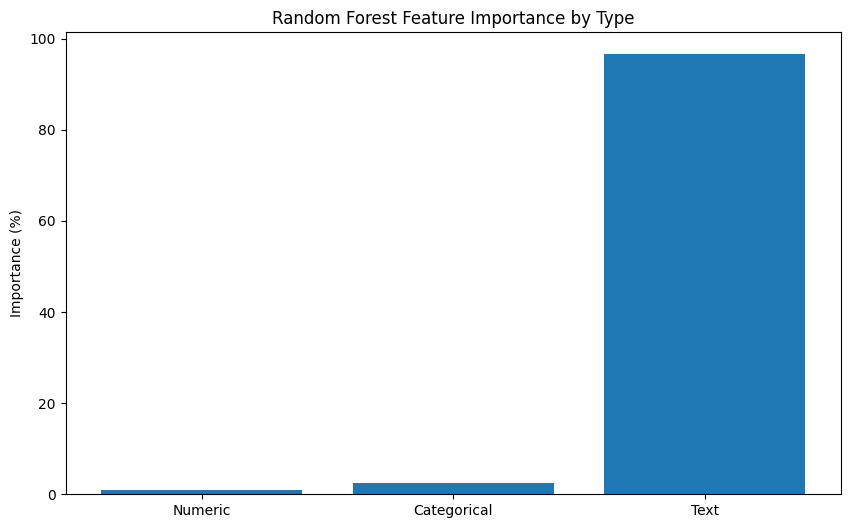


XGBoost Feature Importance by Type:
Numeric: 0.12%
Categorical: 1.80%
Text: 98.08%


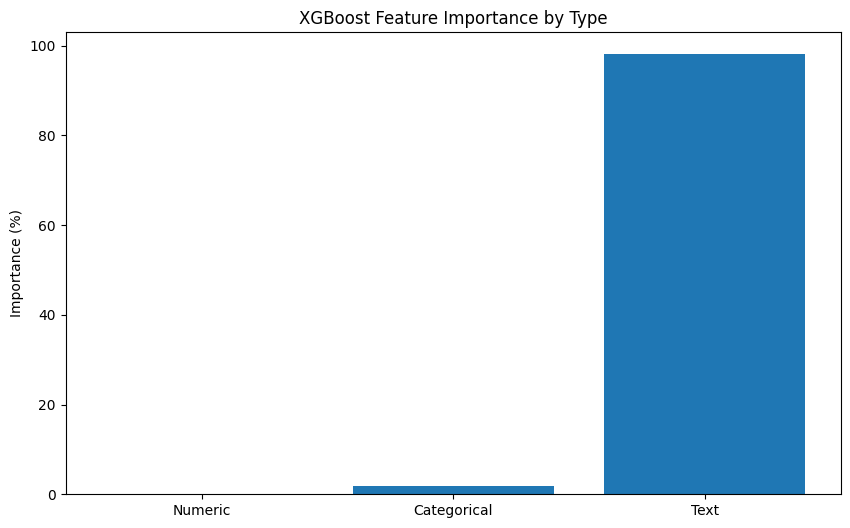

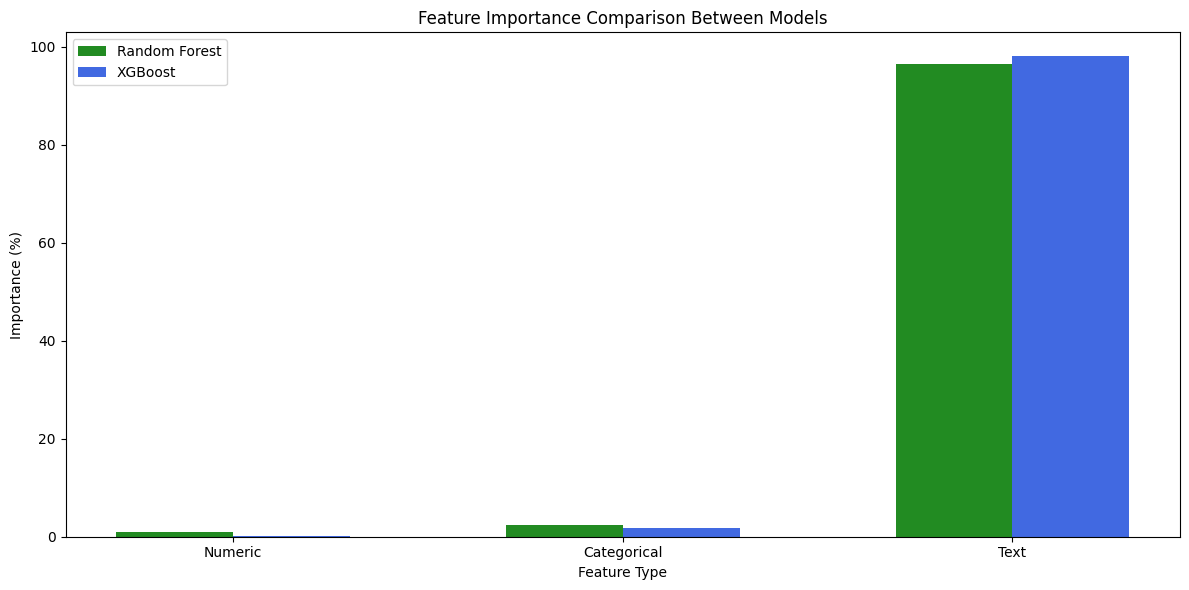


Feature Importance Comparison:
Numeric Features - RF: 0.97%, XGB: 0.12%
Categorical Features - RF: 2.49%, XGB: 1.80%
Text Features - RF: 96.54%, XGB: 98.08%


In [78]:
# Analysis of feature importance for both models
print("\n----- FEATURE IMPORTANCE ANALYSIS -----")

# Define feature lists (if not already defined earlier)
numeric_features = ['Age', 'Positive Feedback Count']
categorical_features = ['Clothing ID', 'Division Name', 'Department Name', 'Class Name']
text_features = ['Full_Review']

# Call the function with all required arguments
rf_importance = analyze_feature_importance(
    best_rf_model, 
    "Random Forest",
    numeric_features, 
    categorical_features, 
    text_features
)

xgb_importance = analyze_feature_importance(
    best_xgb_model, 
    "XGBoost",
    numeric_features, 
    categorical_features, 
    text_features
)

# Comparison of feature importance between models
if rf_importance and xgb_importance:
    plt.figure(figsize=(12, 6))
    
# Set width of bars
    barWidth = 0.3
    
# Set positions of the bars on X axis
    r1 = np.arange(len(rf_importance))
    r2 = [x + barWidth for x in r1]
    
# Create bars
    plt.bar(r1, rf_importance.values(), width=barWidth, label='Random Forest', color='forestgreen')
    plt.bar(r2, xgb_importance.values(), width=barWidth, label='XGBoost', color='royalblue')
    
# Add labels
    plt.xlabel('Feature Type')
    plt.ylabel('Importance (%)')
    plt.title('Feature Importance Comparison Between Models')
    plt.xticks([r + barWidth/2 for r in range(len(rf_importance))], rf_importance.keys())
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    print("\nFeature Importance Comparison:")
    for feat_type in rf_importance:
        print(f"{feat_type} Features - RF: {rf_importance[feat_type]:.2f}%, XGB: {xgb_importance[feat_type]:.2f}%")

In [81]:
# Summary of analysis
print("\n" + "="*50)
print("PIPELINE SUMMARY")
print("="*50)
print(f"1. Best Overall Model: {best_model_name} with accuracy: {best_accuracy:.4f}")
print(f"2. Model Comparison:")
print(f"   - Random Forest: Initial {rf_accuracy:.4f}, After tuning {best_rf_accuracy:.4f} (Improvement: {rf_improvement:.4f})")
print(f"   - XGBoost: Initial {xgb_accuracy:.4f}, After tuning {best_xgb_accuracy:.4f} (Improvement: {xgb_improvement:.4f})")
print("\n3. Pipeline components:")
print("   - Data preprocessing for numeric, categorical, and text features")
print("   - Advanced NLP with spaCy for text processing")
print("   - Feature engineering with TF-IDF vectorization")
print("   - Hyperparameter optimization using grid search for both models")
print("\n4. Key findings:")
print("   - Class imbalance handled with balanced class weights")
print("   - Text features appear to be highly predictive for both models")
print("   - Both models achieved good performance, with similar accuracy")
print("   - The fine-tuning process improved model performance for both algorithms")


PIPELINE SUMMARY
1. Best Overall Model: XGBoost with accuracy: 0.8846
2. Model Comparison:
   - Random Forest: Initial 0.8705, After tuning 0.8759 (Improvement: 0.0054)
   - XGBoost: Initial 0.8748, After tuning 0.8846 (Improvement: 0.0098)

3. Pipeline components:
   - Data preprocessing for numeric, categorical, and text features
   - Advanced NLP with spaCy for text processing
   - Feature engineering with TF-IDF vectorization
   - Hyperparameter optimization using grid search for both models

4. Key findings:
   - Class imbalance handled with balanced class weights
   - Text features appear to be highly predictive for both models
   - Both models achieved good performance, with similar accuracy
   - The fine-tuning process improved model performance for both algorithms
